In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = {
    "title": [
        "Inception", "Interstellar", "The Dark Knight", "Titanic", "Avatar",
        "The Matrix", "Forrest Gump", "The Shawshank Redemption",
        "Gladiator", "Jurassic Park", "Avengers Endgame", "Joker"
    ],
    "genre": [
        "Sci-Fi Action", "Sci-Fi Drama", "Action Crime", "Romance Drama",
        "Sci-Fi Adventure", "Sci-Fi Action", "Drama Romance", "Drama Crime",
        "Action Drama", "Adventure Sci-Fi", "Action Sci-Fi", "Crime Drama"
    ],
    "rating": [8.8, 8.6, 9.0, 7.9, 7.8, 8.7, 8.8, 9.3, 8.5, 8.1, 8.4, 8.5],
    "votes": [2100000, 1800000, 2500000, 1900000, 1700000,
              2000000, 1900000, 2600000, 1600000, 1500000, 2200000, 1400000],
    "year": [2010, 2014, 2008, 1997, 2009, 1999, 1994, 1994, 2000, 1993, 2019, 2019]
}

df = pd.DataFrame(data)
df

,title,genre,rating,votes,year
0,Inception,Sci-Fi Action,8.8,2100000,2010
1,Interstellar,Sci-Fi Drama,8.6,1800000,2014
2,The Dark Knight,Action Crime,9.0,2500000,2008
3,Titanic,Romance Drama,7.9,1900000,1997
4,Avatar,Sci-Fi Adventure,7.8,1700000,2009
5,The Matrix,Sci-Fi Action,8.7,2000000,1999
6,Forrest Gump,Drama Romance,8.8,1900000,1994
7,The Shawshank Redemption,Drama Crime,9.3,2600000,1994
8,Gladiator,Action Drama,8.5,1600000,2000
9,Jurassic Park,Adventure Sci-Fi,8.1,1500000,1993


In [3]:
df.isnull().sum()

,0
title,0
genre,0
rating,0
votes,0
year,0


In [4]:
scaler = MinMaxScaler()
df["votes_normalized"] = scaler.fit_transform(df[["votes"]])

df["weighted_score"] = (df["rating"] * 0.7) + (df["votes_normalized"] * 0.3)

df[["title", "rating", "votes", "weighted_score"]]

,title,rating,votes,weighted_score
0,Inception,8.8,2100000,6.335
1,Interstellar,8.6,1800000,6.120
2,The Dark Knight,9.0,2500000,6.575
3,Titanic,7.9,1900000,5.655
4,Avatar,7.8,1700000,5.535
5,The Matrix,8.7,2000000,6.240
6,Forrest Gump,8.8,1900000,6.285
7,The Shawshank Redemption,9.3,2600000,6.810
8,Gladiator,8.5,1600000,6.000
9,Jurassic Park,8.1,1500000,5.695


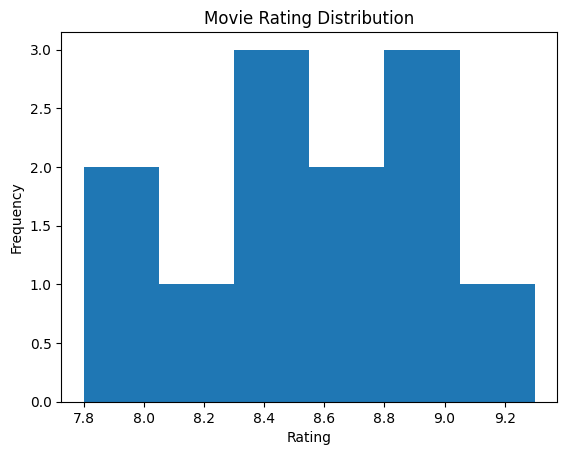

In [5]:
plt.figure()
plt.hist(df["rating"], bins=6)
plt.title("Movie Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

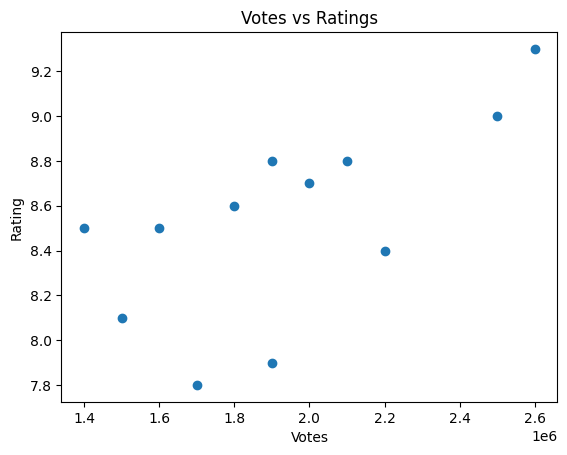

In [6]:
plt.figure()
plt.scatter(df["votes"], df["rating"])
plt.title("Votes vs Ratings")
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.show()

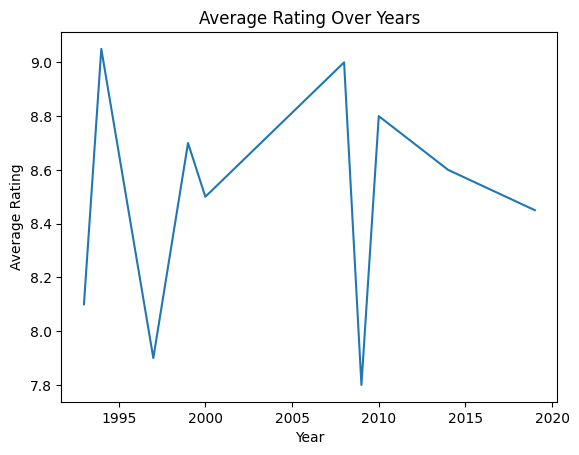

In [7]:
plt.figure()
df.groupby("year")["rating"].mean().plot()
plt.title("Average Rating Over Years")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()

In [8]:
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(df["genre"])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [9]:
def recommend_movies(movie_name, top_n=5):
    index = df[df["title"] == movie_name].index[0]
    similarity_scores = list(enumerate(cosine_sim[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    movie_indices = [i[0] for i in similarity_scores[1:top_n+1]]

    return df.loc[movie_indices, ["title", "genre", "rating", "year", "weighted_score"]]

In [11]:
recommend_movies("Inception")

,title,genre,rating,year,weighted_score
5,The Matrix,Sci-Fi Action,8.7,1999,6.240
10,Avengers Endgame,Action Sci-Fi,8.4,2019,6.080
1,Interstellar,Sci-Fi Drama,8.6,2014,6.120
4,Avatar,Sci-Fi Adventure,7.8,2009,5.535
9,Jurassic Park,Adventure Sci-Fi,8.1,1993,5.695
